In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
indoor_light = ctrl.Antecedent(np.arange(-200, 200, 1), 'indoor_light')
outdoor_light = ctrl.Antecedent(np.arange(0, 1100, 1), 'outdoor_light')

indoor_light.automf(5)
outdoor_light.automf(3)

light = ctrl.Consequent(np.arange(-80, 80, 1), 'led power')
light['vd'] = fuzz.trimf(light.universe, [-80, -80, -40])
light['d'] = fuzz.trimf(light.universe, [-60, -40, 0])
light['n'] = fuzz.trimf(light.universe, [-10, 0, 10])
light['b'] = fuzz.trimf(light.universe, [0, 40, 60])
light['vb'] = fuzz.trimf(light.universe, [40, 80, 80])

C:\Users\Raphael\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


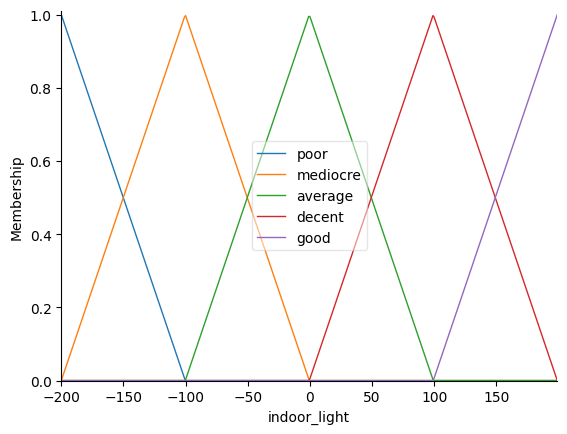

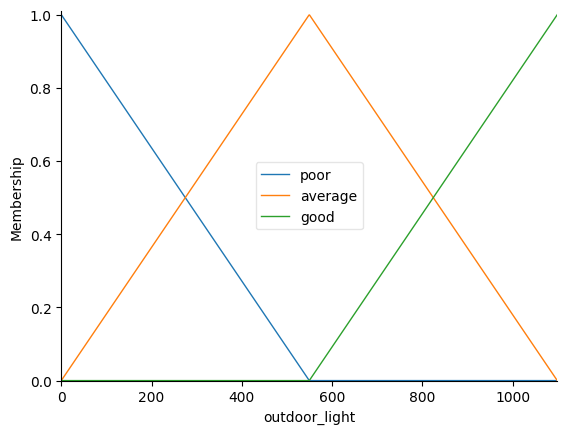

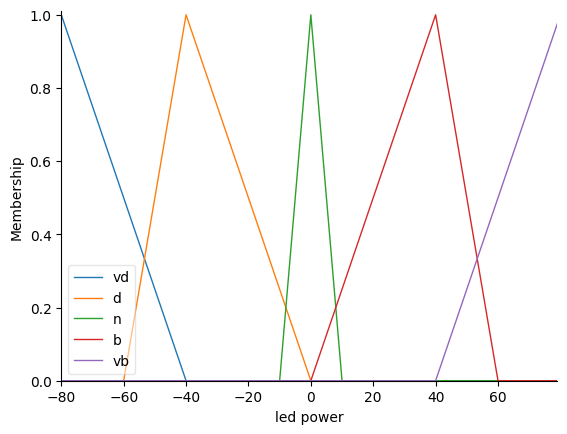

In [4]:
indoor_light.view()
outdoor_light.view()
light.view()

In [5]:
rule1 = ctrl.Rule(indoor_light['poor'] & outdoor_light['poor'], light['vb'])
rule2 = ctrl.Rule(indoor_light['poor'] & outdoor_light['average'], light['vb'])
rule3 = ctrl.Rule(indoor_light['poor'] & outdoor_light['good'], light['b'])
rule4 = ctrl.Rule(indoor_light['mediocre'] & outdoor_light['poor'], light['vb'])
rule5 = ctrl.Rule(indoor_light['mediocre'] & outdoor_light['average'], light['b'])
rule6 = ctrl.Rule(indoor_light['mediocre'] & outdoor_light['good'], light['b'])
rule7 = ctrl.Rule(indoor_light['average'], light['n'])
rule8 = ctrl.Rule(indoor_light['decent'] & outdoor_light['poor'], light['n'])
rule9 = ctrl.Rule(indoor_light['decent'] & outdoor_light['average'], light['d'])
rule10 = ctrl.Rule(indoor_light['decent'] & outdoor_light['good'], light['vd'])
rule11 = ctrl.Rule(indoor_light['good'] & outdoor_light['poor'], light['d'])
rule12 = ctrl.Rule(indoor_light['good'] & outdoor_light['average'], light['vd'])
rule13 = ctrl.Rule(indoor_light['good'] & outdoor_light['good'], light['vd'])

In [6]:
light_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
lighting = ctrl.ControlSystemSimulation(light_ctrl)

In [7]:
lighting.input['indoor_light'] = -100
lighting.input['outdoor_light'] = 500

lighting.compute()

Led Brightness: 35.285188214676054


C:\Users\Raphael\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


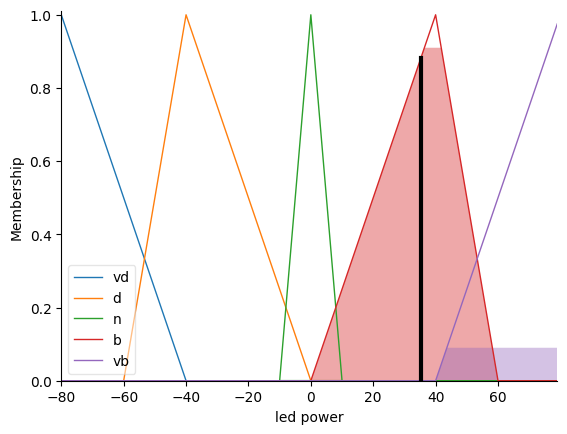

In [8]:
print(f'Led Brightness: {lighting.output["led power"]}')
light.view(sim=lighting)